In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

In [2]:
df=pd.read_csv("Credit_default_modified.csv")

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df_boost=df.copy()

In [5]:
#changing column data types
for col in ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
    df_boost[col]=df_boost[col].astype('category')

In [6]:
df_boost.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'TOTAL_BILL', 'TOTAL_PAY',
       'PAY_TO_BAL_RATIO'],
      dtype='object')

# ADABOOST

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score,make_scorer

In [8]:
X=df_boost.drop('default.payment.next.month', axis=1)
y=df_boost['default.payment.next.month']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

adc=AdaBoostClassifier(n_estimators=300)
adc.fit(X_train,y_train)

y_pred=adc.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, adc.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.8167
Precision: 0.6621
F1 Score: 0.4416
Recall: 0.3313
AUC: 0.7749


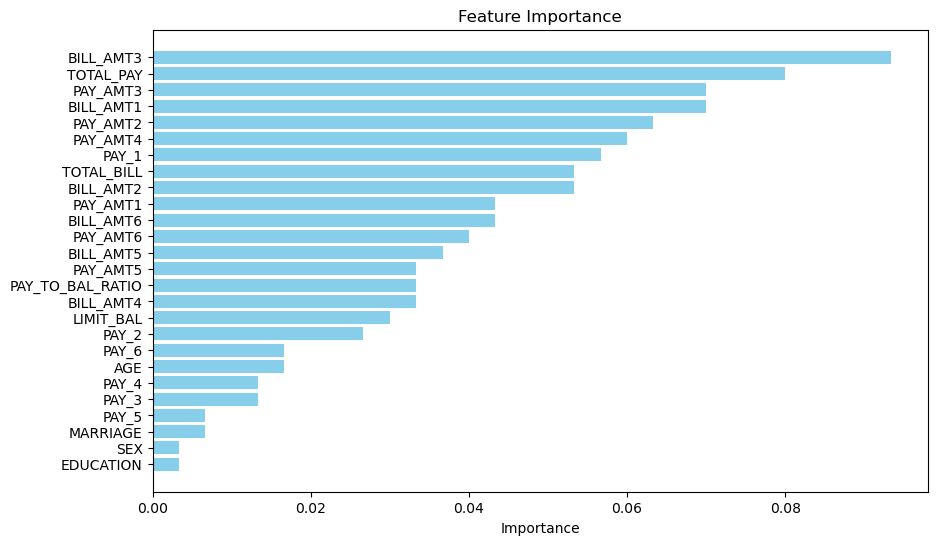

In [10]:
feature_importances = adc.feature_importances_
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# ADABOOST WITH SMOTE

In [11]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[1,2,3,5,6,7,8,9,10])
X_smotenc, y_smotenc = sm.fit_resample(X_train, y_train)

In [12]:
adc=AdaBoostClassifier(n_estimators=300)
adc.fit(X_smotenc,y_smotenc)

y_pred=adc.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, adc.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.7478
Precision: 0.4409
F1 Score: 0.4965
Recall: 0.5682
AUC: 0.7454


# ADABOOST WITH OVERSAMPLING

In [13]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [14]:
adc=AdaBoostClassifier(n_estimators=300)
adc.fit(X_ros,y_ros)

y_pred=adc.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, adc.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.7572
Precision: 0.4590
F1 Score: 0.5249
Recall: 0.6131
AUC: 0.7733


# ADABOOST WITH UNDERSAMPLING

In [15]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)


In [16]:
adc=AdaBoostClassifier(n_estimators=300)
adc.fit(X_rus,y_rus)

y_pred=adc.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, adc.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.7458
Precision: 0.4434
F1 Score: 0.5212
Recall: 0.6321
AUC: 0.7633


# XGBOOST

In [17]:
from xgboost import XGBClassifier

In [18]:
bst = XGBClassifier(tree_method="hist", enable_categorical=True)
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred = bst.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, bst.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.8173
Precision: 0.6415
F1 Score: 0.4731
Recall: 0.3747
AUC: 0.7662



# XGBOOST WITH SMOTE

In [20]:
bst = XGBClassifier(tree_method="hist", enable_categorical=True)
# fit model
bst.fit(X_smotenc, y_smotenc)
# make predictions
y_pred = bst.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, bst.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.7615
Precision: 0.4580
F1 Score: 0.4737
Recall: 0.4905
AUC: 0.7343


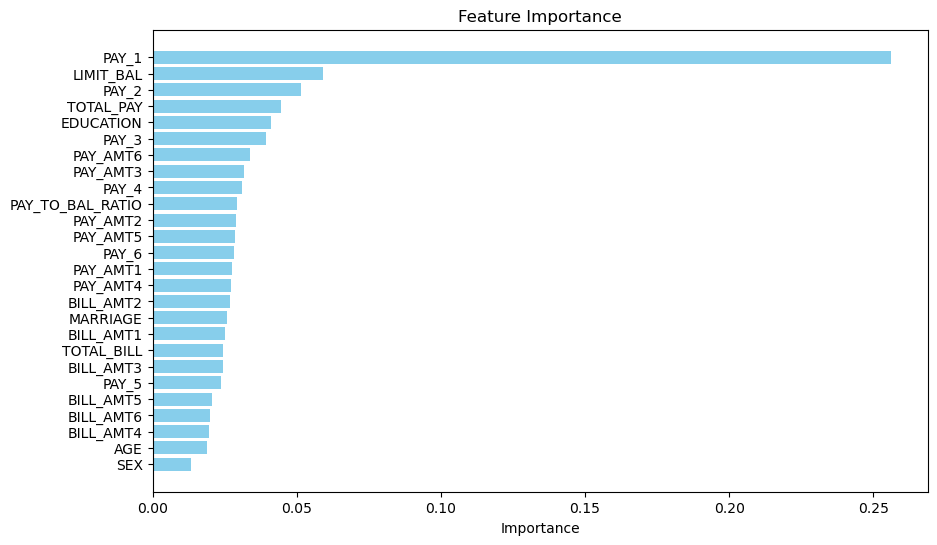

In [21]:
feature_importances = bst.feature_importances_
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# XGBOOST WITH OVERSAMPLING

In [22]:
bst = XGBClassifier(tree_method="hist", enable_categorical=True)
# fit model
bst.fit(X_ros, y_ros)
# make predictions
y_pred = bst.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, bst.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.7640
Precision: 0.4674
F1 Score: 0.5107
Recall: 0.5628
AUC: 0.7577


# XGBOOST WITH UNDERSAMPLING

In [23]:
bst = XGBClassifier(tree_method="hist", enable_categorical=True)
# fit model
bst.fit(X_rus, y_rus)
# make predictions
y_pred = bst.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, bst.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.7083
Precision: 0.3992
F1 Score: 0.4971
Recall: 0.6588
AUC: 0.7642


# LIGHTGBM 

In [24]:
!pip install lightgbm


In [25]:
import lightgbm as lgb 
from sklearn.preprocessing import StandardScaler 
from lightgbm import LGBMClassifier 

In [26]:
#df_scaled=df_boost.copy()

In [27]:
#float_columns = df_scaled.select_dtypes(include=['float64']).columns

#Applying StandardScaler to float columns
#scaler = StandardScaler()
#df_scaled[float_columns] = scaler.fit_transform(df_scaled[float_columns])

#scaling doesn't improve musch

In [28]:
#X_new=df_scaled.drop('default.payment.next.month', axis=1)
#y_new=df_scaled['default.payment.next.month']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

lgb_model=LGBMClassifier(metric='auc',force_col_wise=True,learning_rate=0.1,num_leaves=31,colsample_bytree=0.8,min_child_samples=20,subsample=0.6)
lgb_model.fit(X_train,y_train)

y_pred=lgb_model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


[LightGBM] [Info] Number of positive: 5323, number of negative: 18677
[LightGBM] [Info] Total Bins 4027
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221792 -> initscore=-1.255256
[LightGBM] [Info] Start training from score -1.255256
Accuracy: 0.8222
Precision: 0.6723
F1 Score: 0.4736
Recall: 0.3656
AUC: 0.7818


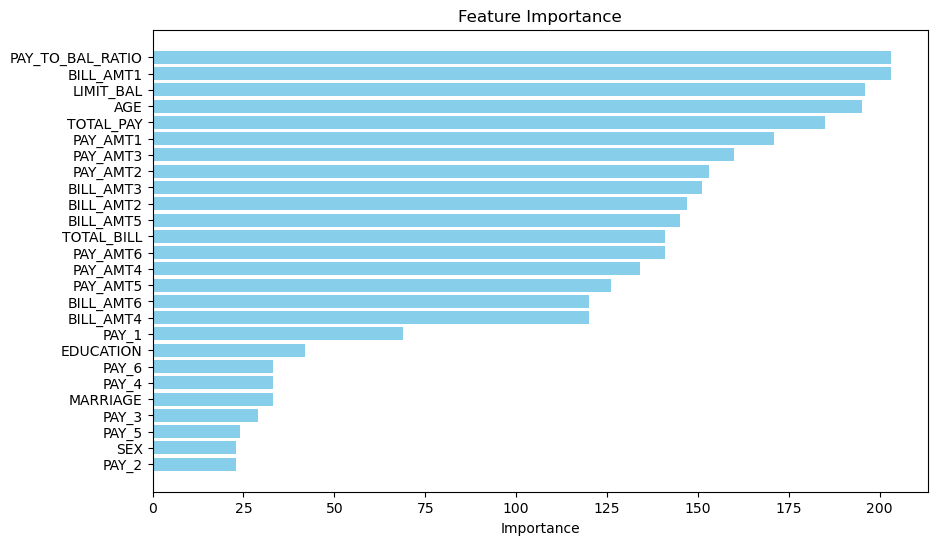

In [30]:
feature_importances = lgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = { 
    'max_depth': [10, 20, 30],
    'min_child_samples': [20, 30, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create a scorer
scorer = make_scorer(f1_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, 
                           scoring=scorer, cv=2, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model
best_model = grid_search.best_estimator_

Fitting 2 folds for each of 81 candidates, totalling 162 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6636, number of negative: 23364
[LightGBM] [Info] Total Bins 4032
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221200 -> initscore=-1.258687
[LightGBM] [Info] Start training from score -1.258687
Best parameters found:  {'colsample_bytree': 0.8, 'max_depth': 20, 'min_child_samples': 30, 'subsample': 0.6}


# LIGHTGBM WITH SMOTE

In [32]:
lgb_model=LGBMClassifier(metric='auc',force_col_wise=True,learning_rate=0.1,num_leaves=31,colsample_bytree=0.8,min_child_samples=20,subsample=0.6)
lgb_model.fit(X_smotenc,y_smotenc)

y_pred=lgb_model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


[LightGBM] [Info] Number of positive: 18677, number of negative: 18677
[LightGBM] [Info] Total Bins 4207
[LightGBM] [Info] Number of data points in the train set: 37354, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.7760
Precision: 0.4886
F1 Score: 0.4978
Recall: 0.5072
AUC: 0.7514


# LIGHTGBM WITH OVERSAMPLING

In [33]:
lgb_model=LGBMClassifier(metric='auc',force_col_wise=True,learning_rate=0.1,num_leaves=31,colsample_bytree=0.8,min_child_samples=20,subsample=0.6)
lgb_model.fit(X_ros,y_ros)

y_pred=lgb_model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


[LightGBM] [Info] Number of positive: 18677, number of negative: 18677
[LightGBM] [Info] Total Bins 4031
[LightGBM] [Info] Number of data points in the train set: 37354, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.7645
Precision: 0.4709
F1 Score: 0.5341
Recall: 0.6169
AUC: 0.7801


# LIGHTGBM WITH UNDERSAMPLING

In [34]:
lgb_model=LGBMClassifier(metric='auc',force_col_wise=True,learning_rate=0.1,num_leaves=31,colsample_bytree=0.8,min_child_samples=20,subsample=0.6)
lgb_model.fit(X_rus,y_rus)

y_pred=lgb_model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


[LightGBM] [Info] Number of positive: 5323, number of negative: 5323
[LightGBM] [Info] Total Bins 4013
[LightGBM] [Info] Number of data points in the train set: 10646, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.7397
Precision: 0.4364
F1 Score: 0.5226
Recall: 0.6512
AUC: 0.7758


In [44]:
adaboost_scores = [
    [0.8167, 0.6621, 0.4416, 0.3313, 0.7749],
    [0.7478, 0.4409, 0.4965, 0.5682, 0.7454],
    [0.7572, 0.4590, 0.5249, 0.6131, 0.7733],
    [0.7458, 0.4434, 0.5212, 0.6321, 0.7633]
]

# Define the updated model names
models = [
    'Adaboost',
    'Adaboost with SMOTE',
    'Adaboost with oversampling',
    'Adaboost with undersampling'
]

# Create the DataFrame
score_df_adaboost = pd.DataFrame(adaboost_scores, columns=['Accuracy', 'Precision', 'F1 Score', 'Recall', 'AUC'])

# Add the model names as a column
score_df_adaboost['Model'] = models

# Set the 'Model' column as the index
score_df_adaboost.set_index('Model', inplace=True)


In [45]:
score_df_adaboost

,Accuracy,Precision,F1 Score,Recall,AUC
Model,,,,,
Adaboost,0.8167,0.6621,0.4416,0.3313,0.7749
Adaboost with SMOTE,0.7478,0.4409,0.4965,0.5682,0.7454
Adaboost with oversampling,0.7572,0.4590,0.5249,0.6131,0.7733
Adaboost with undersampling,0.7458,0.4434,0.5212,0.6321,0.7633


In [39]:
data = {
    'Model': [
        'Xgboost',
        'Xgboost with SMOTE',
        'Xgboost with oversampling',
        'Xgboost with undersampling'
    ],
    'Accuracy': [
        0.8173, 
        0.7615, 
        0.7640, 
        0.7083
    ],
    'Precision': [
        0.6415, 
        0.4580, 
        0.4674, 
        0.3992
    ],
    'F1 Score': [
        0.4731, 
        0.4737, 
        0.5107, 
        0.4971
    ],
    'Recall': [
        0.3747, 
        0.4905, 
        0.5628, 
        0.6588
    ],
    'AUC': [
        0.7662,
        0.7343,
        0.7577,
        0.7642
      
    ]
}

# Create the DataFrame
score_df_xgboost = pd.DataFrame(data)

# Set the 'Model' column as the index
score_df_xgboost.set_index('Model', inplace=True)

In [40]:
score_df_xgboost

,Accuracy,Precision,F1 Score,Recall,AUC
Model,,,,,
Xgboost,0.8173,0.6415,0.4731,0.3747,0.7662
Xgboost with SMOTE,0.7615,0.4580,0.4737,0.4905,0.7343
Xgboost with oversampling,0.7640,0.4674,0.5107,0.5628,0.7577
Xgboost with undersampling,0.7083,0.3992,0.4971,0.6588,0.7642


In [46]:
lightgbm_scores = [
    [0.8222, 0.6723, 0.4736, 0.3656, 0.7818],
    [0.7760, 0.4886, 0.4978, 0.5072, 0.7514],
    [0.7645, 0.4709, 0.5341, 0.6169, 0.7801],
    [0.7397, 0.4364, 0.5226, 0.6512, 0.7758]
]

lightgbm_models = [
    'LightGBM',
    'LightGBM with SMOTE',
    'LightGBM with oversampling',
    'LightGBM with undersampling'
]

score_df_lightgbm = pd.DataFrame(lightgbm_scores, columns=['Accuracy', 'Precision', 'F1 Score', 'Recall', 'AUC'])
score_df_lightgbm['Model'] = lightgbm_models
score_df_lightgbm.set_index('Model', inplace=True)


In [47]:
score_df_lightgbm

,Accuracy,Precision,F1 Score,Recall,AUC
Model,,,,,
LightGBM,0.8222,0.6723,0.4736,0.3656,0.7818
LightGBM with SMOTE,0.7760,0.4886,0.4978,0.5072,0.7514
LightGBM with oversampling,0.7645,0.4709,0.5341,0.6169,0.7801
LightGBM with undersampling,0.7397,0.4364,0.5226,0.6512,0.7758


In [49]:
final_table_boosting=pd.concat([score_df_adaboost,score_df_xgboost,score_df_lightgbm])

In [63]:
final_table_boosting.to_csv('Score table of Boosting Algos.csv',index=True)

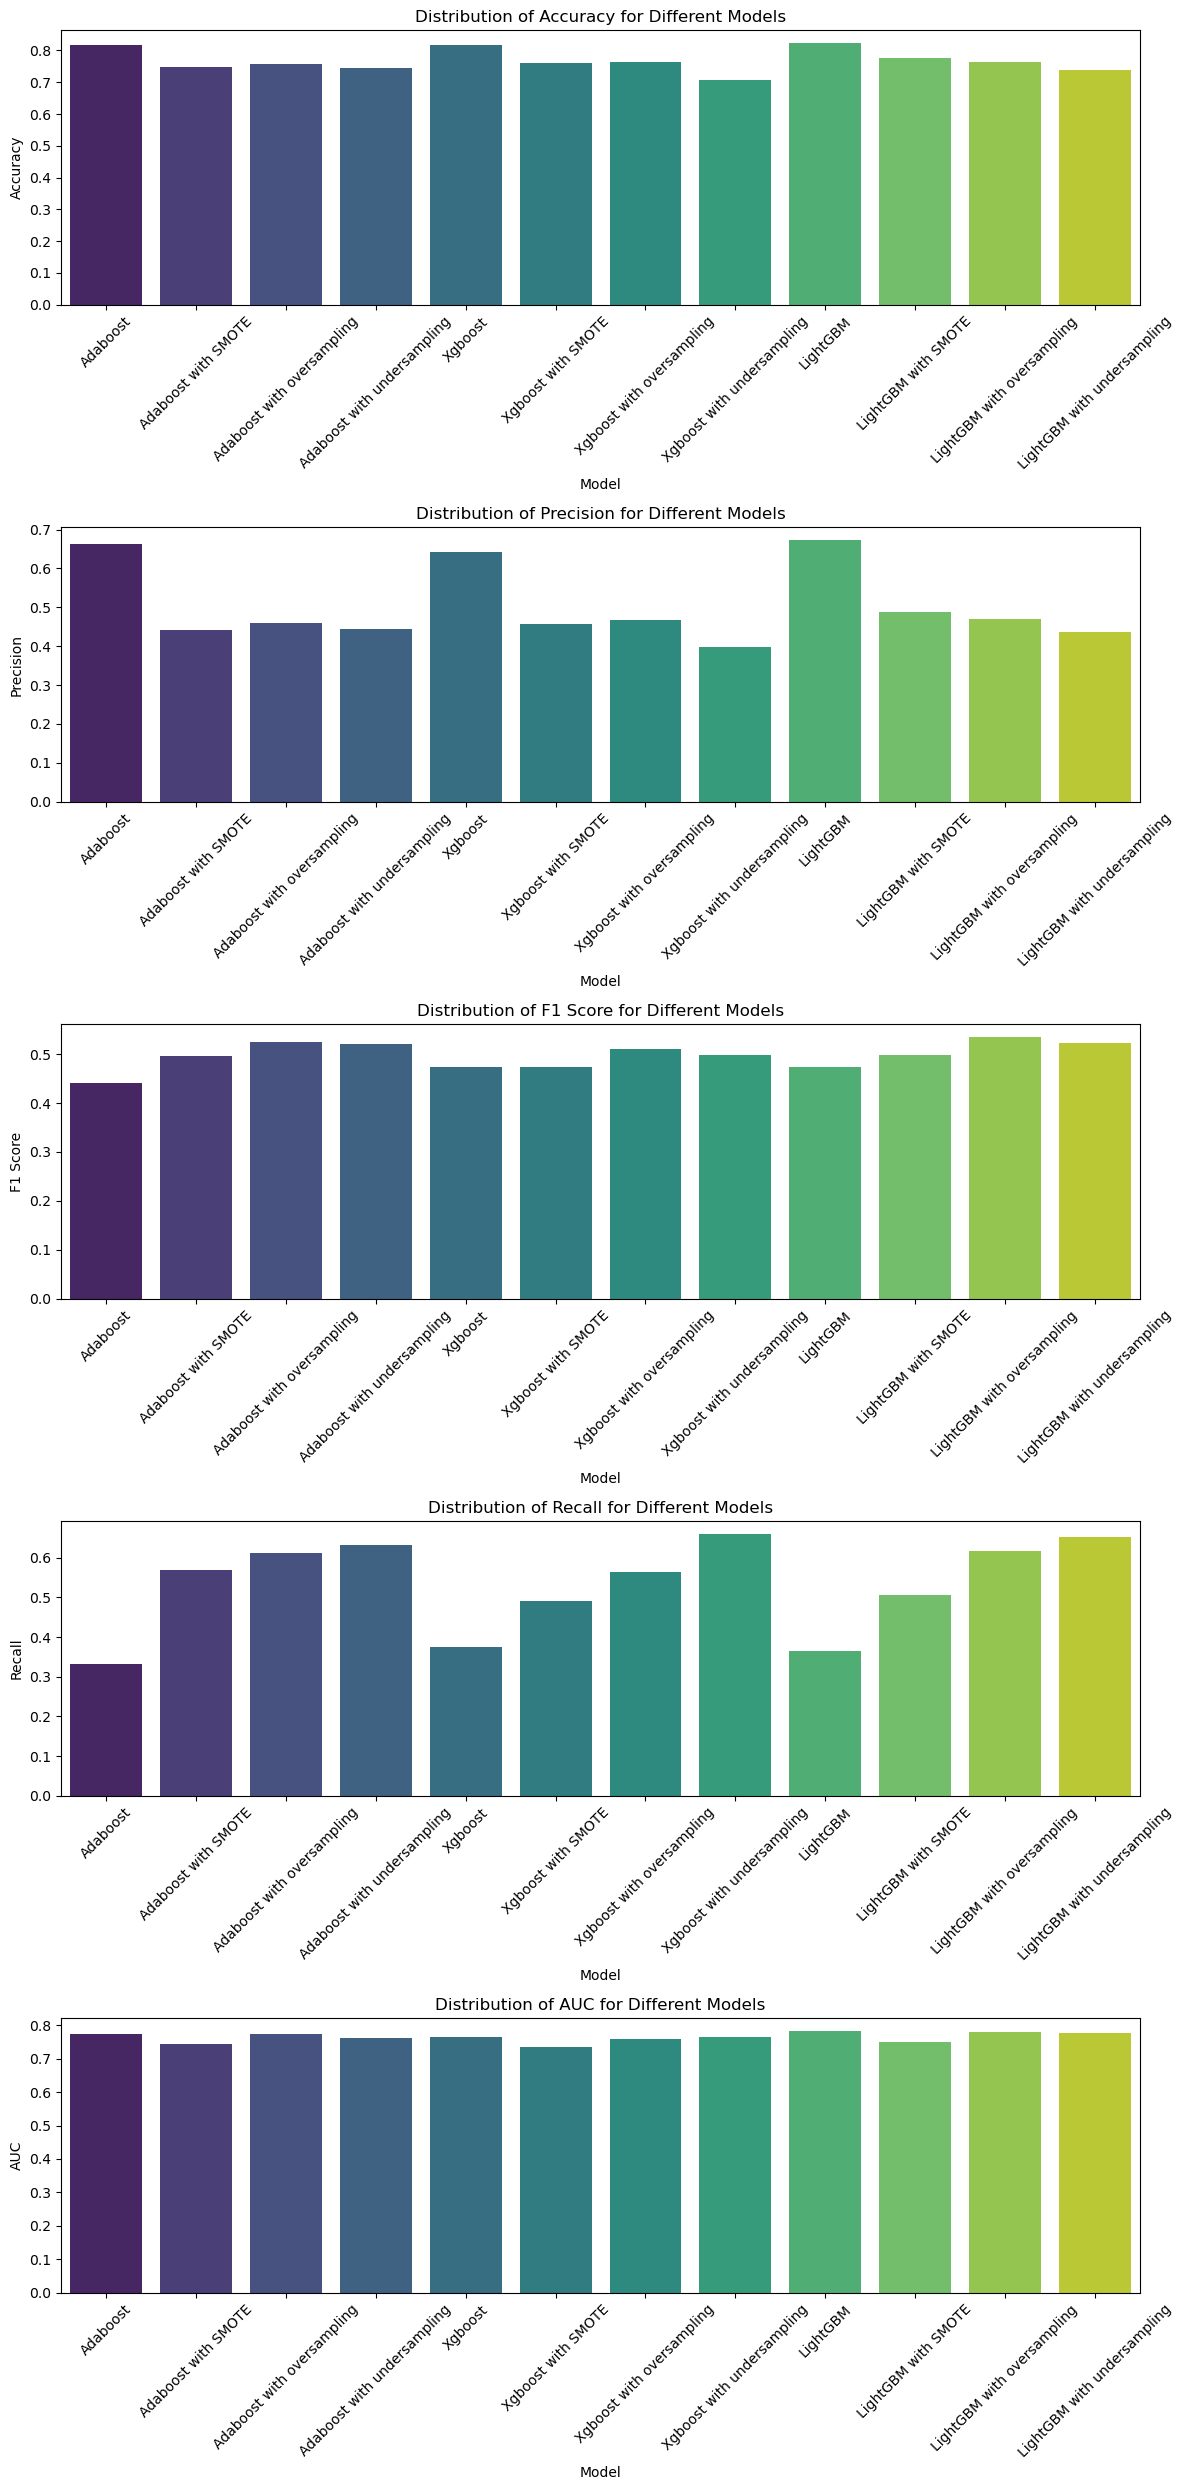

In [65]:
final_table_boosting_melted = final_table_boosting.reset_index().melt(id_vars='Model', var_name='Metric', value_name='Value')

# Get the unique metrics
metrics = final_table_boosting_melted['Metric'].unique()

# Create a grid of subplots
num_metrics = len(metrics)
fig, axes = plt.subplots(num_metrics, 1, figsize=(12, num_metrics * 5))

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(data=final_table_boosting_melted[final_table_boosting_melted['Metric'] == metric],
                x='Model', y='Value', ax=ax, palette="viridis")
    ax.set_title(f'Distribution of {metric} for Different Models')
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('Boosting_algos_metrics_distribution.jpeg', format='jpeg')